In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
path="/its/home/drs25/RoboSkin/Code/NewRigExperiments/"

## loss experiment


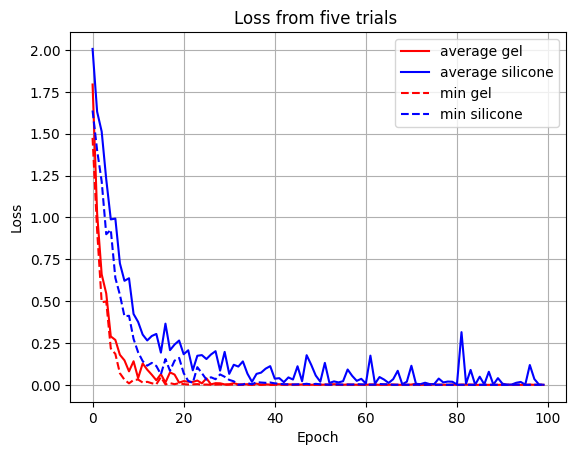

In [10]:
asil=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/accuracies_of_sil.npy")
sil_loss=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/loss_of_sil.npy")
agel=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/accuracies_of_gel.npy")
gel_loss=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/loss_of_gel.npy")

averaged_gel=np.average(gel_loss,axis=0)
averaged_sil=np.average(sil_loss,axis=0)
min_gel=np.min(gel_loss,axis=0)
min_sil=np.min(sil_loss,axis=0)

plt.plot(averaged_gel,c="r",label="average gel")
plt.plot(averaged_sil,c="b",label="average silicone")
plt.plot(min_gel,"--",c="r",label="min gel")
plt.plot(min_sil,"--",c="b",label="min silicone")

plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Loss from five trials ")
plt.grid()
plt.savefig("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/images/lossGelvsSil.pdf")
plt.show()

## Resolution

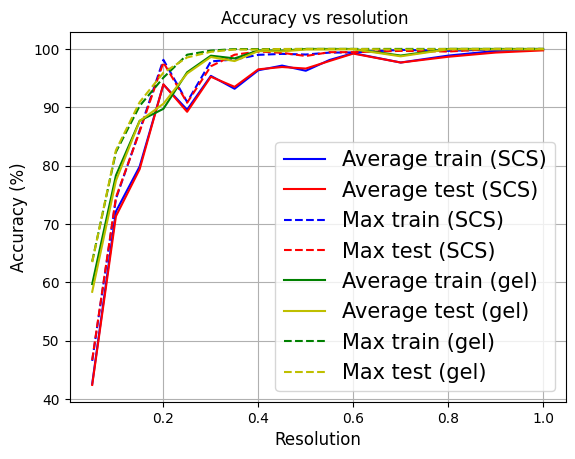

In [8]:
x=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1]
train_scores=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/resolutions_train.npy")
test_scores=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/resolutions_test.npy")

train_scoresG=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/resolutions_train_gel.npy")
test_scoresG=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/resolutions_test_gel.npy")

plt.plot(x,np.average(train_scores,axis=1)*100,c="b",label="Average train (SCS)")
plt.plot(x,np.average(test_scores,axis=1)*100,c="r",label="Average test (SCS)")
plt.plot(x,np.max(train_scores,axis=1)*100,"--",c="b",label="Max train (SCS)")
plt.plot(x,np.max(test_scores,axis=1)*100,"--",c="r",label="Max test (SCS)")

plt.plot(x,np.average(train_scoresG,axis=1)*100,c="g",label="Average train (gel)")
plt.plot(x,np.average(test_scoresG,axis=1)*100,c="y",label="Average test (gel)")
plt.plot(x,np.max(train_scoresG,axis=1)*100,"--",c="g",label="Max train (gel)")
plt.plot(x,np.max(test_scoresG,axis=1)*100,"--",c="y",label="Max test (gel)")


plt.ylabel("Accuracy (%)",fontsize=12)
plt.xlabel("Resolution",fontsize=12)
plt.title("Accuracy vs resolution ",fontsize=12)
plt.legend(loc="lower right",fontsize=15)
plt.grid()
plt.savefig("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/images/ResolutionVsAccuracy.pdf")
plt.show()

In [ ]:
datapath="C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/texture-tactip/"
data = np.load(datapath+"X_texture_all.npz") #load data
for array_name in data:
    X=(data[array_name].astype(np.uint8))
X=X[:,:4].reshape((len(X),4*X.shape[2],X.shape[3]))

0.05 -- 6 22
0.1 -- 12 44
0.15 -- 18 66
0.2 -- 24 88
0.25 -- 30 110
0.3 -- 36 132
0.35 -- 42 154
0.4 -- 48 176
0.45 -- 54 198
0.5 -- 60 220
0.55 -- 66 242
0.6 -- 72 264
0.7 -- 84 308
0.8 -- 96 352
0.9 -- 108 396
1 -- 120 440


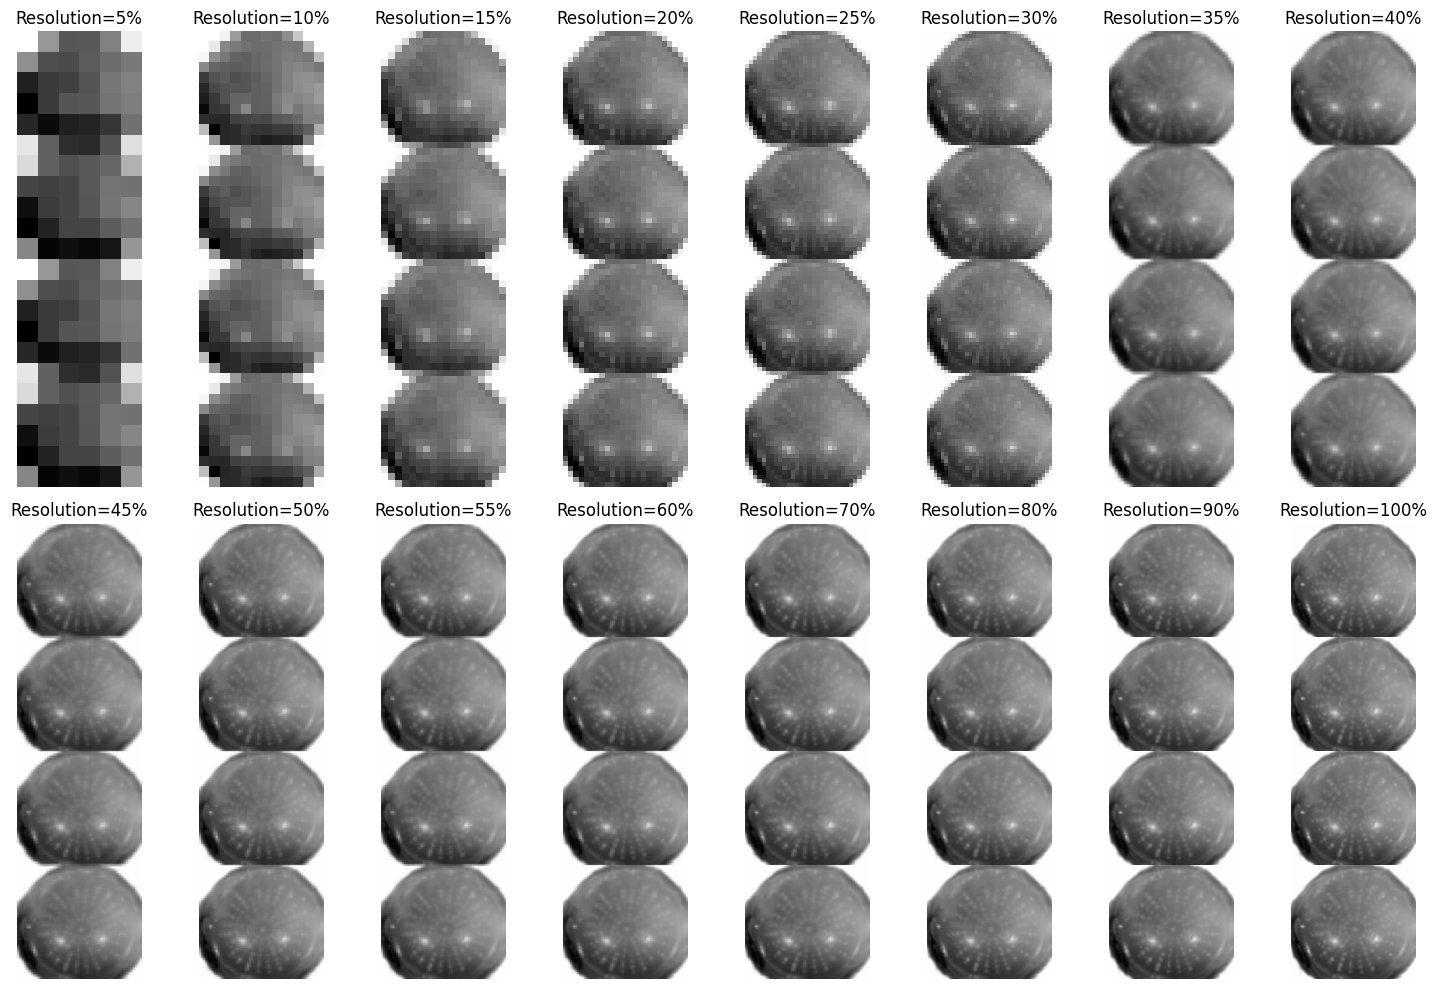

In [28]:
images=[]
for percentage in x:
    data=X[0]
    h,w=data.shape
    w=int(w*percentage)
    h=int(h*percentage)
    print(percentage,"--",w,h)
    images.append(cv2.resize(data,(w,h),interpolation=cv2.INTER_AREA))

fig, axes = plt.subplots(2, 8, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(images)):
    axes[i].imshow(images[i],cmap="gray")
    axes[i].set_title("Resolution="+str(int(x[i]*100))+"%")
    axes[i].axis('off')  # Hide the axis

plt.tight_layout()
plt.savefig("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/images/resolutions.pdf")
plt.show()

# plotting new morph

In [2]:
data = np.load("/its/home/drs25/Documents/data/Tactile Dataset/datasets/"+"X_data_newMorph.npz") #load data
X=None
for array_name in data:
    X=(data[array_name].astype(np.uint8))

image=X[0][0].copy()
del X

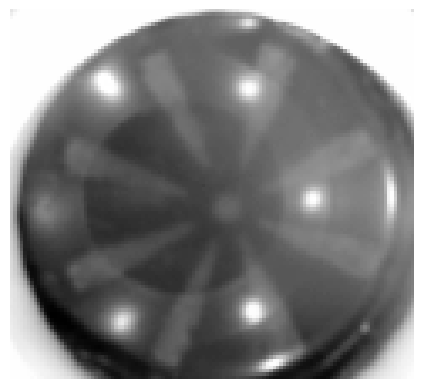

In [4]:
plt.imshow(image,cmap="gray")
plt.axis("off")
plt.savefig("/its/home/drs25/Documents/GitHub/RoboSkin/Code/NewRigExperiments/images/newMorph.pdf")
plt.show()

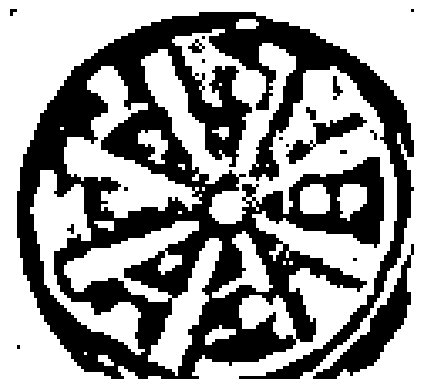

In [15]:
threshold_value = 150  # You can change this value according to your needs
max_value = 255        # This is the value assigned to pixel values exceeding the threshold
thresh_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

#ret, thresh_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_TRUNC)
plt.imshow(th2,cmap="gray")
plt.axis("off")
plt.show()

# statistics testing

In [3]:
#LSTM----------------
#   mew morph
#model 1
#87.9 89.8
#model2
#87.8 89.2
#model 3 
#89.2 91.1
#model 4
#92.1 93.5
#model 5
#91.7 94.3
print(np.average([87.9,87.8,89.2,92.1,91.7]))
#   standard
#model 1
#92.8 92.3
#model2
#99.9 99.9
#model 3 
#99.9 99.9
#model 4
#99.9 99.9
#model 5
#99.9 99.9
print(np.average([92.8, 99.9, 99.9,99.9, 99.9]))
#----------------------
#cnn
#   mew morph
#model 1
#95 93
#model2
#88 88
#model 3 
#95.2 96.6
#model 4
#92.5 92.4
#model 5
#92 93
#model 6
#98.2 98.9
print(np.average([95,88,95.2,92.5,92,98]))
#   standard
#model 1
#99.9 99.9
#model2
#99.9 99.9
#model 3 
#99.9 99.9
#model 4
#99.9 99.9
#model 5
#99.9 99.9
print(np.average([99.9,99.9,99.9,99.9,99.9]))
##############
#electrical lstm hybrid
[85.5,86.3,84.3,85.5,85]




lstm_optical_train=[0.9987359531052492,
 0.9995693906182717,
 0.9537303274020363,
 0.9999861093747829,
 0.999708296870442,
 0.9995693906182717,
 0.9995693906182717,
 0.9899848592185134,
 0.9999861093747829,
 0.9999861093747829,
 0.9998472031226125,
 0.9998472031226125,
 0.9995693906182717,
 0.9994304843661013,
 0.9406731396980178,
 0.9849842341403786,
 0.9995693906182717,
 0.999708296870442,
 0.9998472031226125,
 0.9574807962106374]

lstm_optical_test=[0.9977223487584024,
 0.9993889228376202,
 0.9593911449363924,
 0.9993889228376202,
 0.9993889228376202,
 0.9999444475306928,
 0.9993889228376202,
 0.9843897561246598,
 0.9993889228376202,
 0.9999444475306928,
 0.9988333981445475,
 0.9999444475306928,
 0.9999444475306928,
 0.9999444475306928,
 0.9338370090550525,
 0.9821676573523693,
 0.9988333981445475,
 0.9999444475306928,
 0.998277873451475,
 0.9493917004610856]

cnn_optical_test=[0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529,
 0.9997619614377529]

cnn_optical_nm_test=[0.8997857652939776,
 0.8593192097119733,
 0.8712211378243275,
 0.8950249940490359,
 0.9307307783860985,
 0.87836229469174,
 0.9426327064984527,
 0.9093073077838609,
 0.8426565103546774,
 0.8759819090692692,
 0.8593192097119733,
 0.8807426803142109,
 0.9093073077838609,
 0.8997857652939776,
 0.9069269221613901,
 0.8997857652939776,
 0.8736015234467983,
 0.8616995953344442,
 0.9164484646512735,
 0.937871935253511]


ELEC_LSTM_test=[np.float64(84.0), np.float64(85.66666666666667), np.float64(86.16666666666667), np.float64(85.83333333333333), np.float64(86.5), np.float64(85.5), np.float64(85.66666666666667), np.float64(85.16666666666667), np.float64(85.0), np.float64(85.0), np.float64(86.33333333333333), np.float64(84.66666666666667), np.float64(84.83333333333334), np.float64(85.5), np.float64(86.5), np.float64(85.5), np.float64(84.5), np.float64(85.5), np.float64(86.33333333333333), np.float64(85.83333333333333)]
ELEC_LSTM_train=[np.float64(90.04166666666666), np.float64(90.08333333333334), np.float64(90.16666666666666), np.float64(90.83333333333333), np.float64(90.08333333333334), np.float64(90.08333333333334), np.float64(90.04166666666666), np.float64(90.04166666666666), np.float64(90.33333333333333), np.float64(90.08333333333334), np.float64(90.45833333333333), np.float64(90.04166666666666), np.float64(90.20833333333333), np.float64(90.04166666666666), np.float64(90.04166666666666), np.float64(90.125), np.float64(90.08333333333334), np.float64(90.04166666666666), np.float64(90.125), np.float64(90.04166666666666)]

piez_LSTM_test=[np.float64(77.66666666666666), np.float64(77.83333333333333), np.float64(78.33333333333333), np.float64(77.83333333333333), np.float64(76.33333333333333), np.float64(77.33333333333333), np.float64(76.66666666666667), np.float64(77.66666666666666), np.float64(77.83333333333333), np.float64(76.33333333333333), np.float64(76.16666666666667), np.float64(78.0), np.float64(78.16666666666666), np.float64(76.66666666666667), np.float64(77.16666666666666), np.float64(77.66666666666666), np.float64(77.66666666666666), np.float64(77.66666666666666), np.float64(78.0), np.float64(76.33333333333333)]
piez_LSTM_train=[np.float64(85.875), np.float64(84.41666666666666), np.float64(84.79166666666667), np.float64(84.91666666666666), np.float64(86.66666666666667), np.float64(85.95833333333334), np.float64(86.29166666666667), np.float64(84.5), np.float64(84.625), np.float64(84.04166666666667), np.float64(83.25), np.float64(87.33333333333333), np.float64(84.54166666666667), np.float64(85.29166666666667), np.float64(83.375), np.float64(83.95833333333333), np.float64(85.79166666666667), np.float64(85.29166666666667), np.float64(85.16666666666667), np.float64(84.5)]

svm=[np.float64(1.0), np.float64(1.0), np.float64(0.9994444444444445), np.float64(0.9994444444444445), np.float64(0.9988888888888889)]
print(np.average(svm))

ELEC_ANN_test=[np.float64(39.0), np.float64(38.83333333333333), np.float64(40.33333333333333), np.float64(39.5), np.float64(39.33333333333333), np.float64(39.166666666666664), np.float64(40.166666666666664), np.float64(41.0), np.float64(38.666666666666664), np.float64(38.333333333333336), np.float64(40.0), np.float64(39.83333333333333), np.float64(40.5), np.float64(39.83333333333333), np.float64(40.0), np.float64(40.166666666666664), np.float64(40.5), np.float64(39.5), np.float64(39.83333333333333), np.float64(38.5)]
ELEC_ANN_train=[np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5), np.float64(84.5)]

89.74
98.47999999999999
93.45
99.9
0.9995555555555555


In [22]:
test=np.load(path+"/data/test_SVM_piez_accuracies_20_trials.npy")
train=np.load(path+"/data/train_SVM_piez_accuracies_20_trials.npy")
np.set_printoptions(precision=5)
print(test)
print(np.average(train))
print(np.std(train))


print(np.average(test))
print(np.std(test))

print(np.max(test))

[0.695   0.70333 0.68833 0.70833 0.7     0.67333 0.715   0.70667 0.70667
 0.70167 0.71333 0.685   0.705   0.69667 0.69667 0.71667 0.68833 0.70833
 0.69833 0.69333]
0.7047916666666667
0.0033320309955874555
0.7
0.01060660171779821
0.7166666666666667


In [7]:
from scipy.stats import ranksums
import numpy as np
optical_accuracy = cnn_optical_test  # Example data
electrical_accuracy = cnn_optical_nm_test  # Example data

# Perform Wilcoxon rank-sum test
stat, p_value = ranksums(optical_accuracy, electrical_accuracy)

# Print results
print(f"Statistic: {stat}")
print(f"P-value: {p_value }")

# Check significance
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("No statistically significant difference.")

Statistic: 5.410017808004594
P-value: 6.301848221392269e-08
The difference is statistically significant.


In [4]:
import numpy as np
import pandas as pd

# List of filenames
file_names = ["test_elec_accuracies_20_trials.npy", "train_elec_accuracies_20_trials.npy", 
              "test_LSTM_accuracies_20_trials.npy","train_LSTM_accuracies_20_trials.npy",
              "test_CNN_accuracies_20_trials.npy","train_CNN_accuracies_20_trials.npy",
              "test_CNN_NM_accuracies_20_trials.npy","train_CNN_NM_accuracies_20_trials.npy",
              "test_piez_accuracies_20_trials.npy","train_piez_accuracies_20_trials.npy",]  # Add your filenames here

# List of column names
names = ["Piezo Acc LSTM test","Piezo Acc LSTM train",
         "Optical 1 LSTM test","Optical 1 LSTM train",
         "Optical 1 CNN test","Optical 1 CNN train",
         "Optical 2 CNN test","Optical 2 CNN train",
         "Piezo LSTM test","Piezo LSTM train"]  # Ensure this list matches the number of files

# Check that the number of names matches the number of files
if len(names) != len(file_names):
    raise ValueError("The number of names must match the number of file names.")

# Initialize a dictionary to store the data
data_dict = {}

# Load data from each file and add it as a column
for file, name in zip(file_names, names):
    data=np.load(path+"/data/"+file)
    if data[0]>1:
        data=data/100
    data_dict[name] = data

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data_dict)

# Save the DataFrame to a CSV file
df.to_csv(path+"/data/output.csv", index=False)

print("Data saved to output.csv")


Data saved to output.csv
